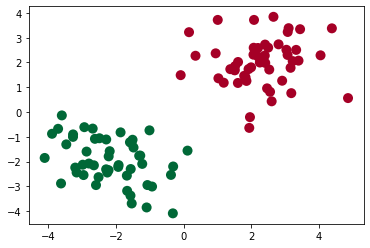

epoch 1, loss 0.1309, train accuracy 0.590
epoch 2, loss 0.0679, train accuracy 0.920
epoch 3, loss 0.0405, train accuracy 0.980
epoch 4, loss 0.0269, train accuracy 0.990
epoch 5, loss 0.0198, train accuracy 1.000
epoch 6, loss 0.0152, train accuracy 1.000
epoch 7, loss 0.0129, train accuracy 1.000
epoch 8, loss 0.0119, train accuracy 1.000
epoch 9, loss 0.0116, train accuracy 1.000
epoch 10, loss 0.0109, train accuracy 1.000
epoch 11, loss 0.0111, train accuracy 1.000
epoch 12, loss 0.0107, train accuracy 1.000
epoch 13, loss 0.0107, train accuracy 1.000
epoch 14, loss 0.0108, train accuracy 1.000
epoch 15, loss 0.0106, train accuracy 1.000
epoch 16, loss 0.0106, train accuracy 1.000
epoch 17, loss 0.0107, train accuracy 1.000
epoch 18, loss 0.0104, train accuracy 1.000
epoch 19, loss 0.0110, train accuracy 1.000
epoch 20, loss 0.0106, train accuracy 1.000


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

n_data=torch.ones(50,2)
x1=torch.normal(2*n_data,1)
y1=torch.zeros(50)
x2=torch.normal(-2*n_data,1)
y2=torch.ones(50)

features=torch.cat((x1,x2),0).type(torch.FloatTensor)
labels=torch.cat((y1,y2),0).type(torch.FloatTensor)

testfeatures=torch.cat((x1,x2),0).type(torch.FloatTensor)
testlabels=torch.cat((y1,y2),0).type(torch.FloatTensor)

plt.scatter(features.data.numpy()[:,0],features.data.numpy()[:,1],c=labels.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    np.random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

num_inputs = 2
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
def linreg(X,w,b):
    return torch.mm(X,w)+b
def squared_loss(y_hat,y):
    return(y_hat-y.view(y_hat.size()))**2/2
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

def evaluate_accuracy():  
    acc_sum,n = 0.0,0 
    for X,y in data_iter(batch_size, features, labels):  
        y_hat = net(X, w, b)  
        y_hat = torch.squeeze(torch.where(y_hat>0.5,torch.tensor(1.0),torch.tensor(0.0)))  
        acc_sum += (y_hat==y).float().sum().item() 
        n+=y.shape[0]  
    return acc_sum/n,test_l_sum/n 

lr = 0.03  
num_epochs = 20
net = linreg  
loss = squared_loss
batch_size = 10  
train_acc= []
train_loss =[] 
for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期  
    train_l_sum, train_acc_sum,n = 0.0,0.0,0  
#在每一个迭代周期中，会使用训练数据集中所有样本一次  
    for X, y in data_iter(batch_size, features, labels): # x和y分别是小批量样本的特征和标签 
        y_hat = net(X, w, b)  
        l = loss(y_hat, y).sum() # l是有关小批量X和y的损失  
        l.backward() # 小批量的损失对模型参数求梯度  
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数  
        w.grad.data.zero_() # 梯度清零  
        b.grad.data.zero_() # 梯度清零  
        #计算每个epoch的loss  
        train_l_sum += l.item()  
        #计算训练样本的准确率  
        y_hat = torch.squeeze(torch.where(y_hat>0.5,torch.tensor(1.0),torch.tensor(0.0)))  
        train_acc_sum += (y_hat==y).sum().item()  
        #每一个epoch的所有样本数 
        n+= y.shape[0]  
        #train_l = loss(net(trainfeatures, w, b), trainlabels)  
    train_acc.append(train_acc_sum/n)
    train_loss.append(train_l_sum/n)
    print('epoch %d, loss %.4f, train accuracy %.3f'
          % (epoch + 1, train_loss[epoch], train_acc[epoch]))

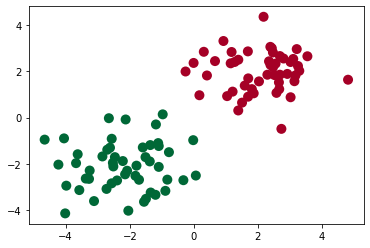

epoch 0, loss 0.305872, train accuracy:1.000000
epoch 1, loss 0.157090, train accuracy:1.000000
epoch 2, loss 0.143289, train accuracy:1.000000
epoch 3, loss 0.153750, train accuracy:1.000000
epoch 4, loss 0.101263, train accuracy:1.000000
epoch 5, loss 0.104424, train accuracy:1.000000
epoch 6, loss 0.069817, train accuracy:1.000000
epoch 7, loss 0.050370, train accuracy:1.000000
epoch 8, loss 0.086679, train accuracy:1.000000
epoch 9, loss 0.048750, train accuracy:1.000000
epoch 10, loss 0.059593, train accuracy:1.000000
epoch 11, loss 0.092387, train accuracy:1.000000
epoch 12, loss 0.026894, train accuracy:1.000000
epoch 13, loss 0.057558, train accuracy:1.000000
epoch 14, loss 0.065686, train accuracy:1.000000
epoch 15, loss 0.018252, train accuracy:1.000000
epoch 16, loss 0.034482, train accuracy:1.000000
epoch 17, loss 0.041382, train accuracy:1.000000
epoch 18, loss 0.052041, train accuracy:1.000000
epoch 19, loss 0.055404, train accuracy:1.000000
epoch 20, loss 0.031634, train

In [3]:
import torch
from torch import tensor
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.nn import init
import torch.optim as optim

# 1、生成训练集
num_inputs = 2  # 特征数
n_data=torch.ones(50,2)
x1=torch.normal(2*n_data,1)
y1=torch.zeros(50)
x2=torch.normal(-2*n_data,1)
y2=torch.ones(50)

features=torch.cat((x1,x2),0).type(torch.FloatTensor)
labels=torch.cat((y1,y2),0).type(torch.FloatTensor)

testfeatures=torch.cat((x1,x2),0).type(torch.FloatTensor)
testlabels=torch.cat((y1,y2),0).type(torch.FloatTensor)

plt.scatter(features.data.numpy()[:,0],features.data.numpy()[:,1],c=labels.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

# 2、读取数据，采用PyTorch提供的data库读取数据。
dataset = Data.TensorDataset(features, labels)

lr = 0.03
num_epochs = 20
batch_size = 10
# 把dataset放入DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,  # torch TensorDataset format
    batch_size=batch_size,
    shuffle=True,  # 是否打乱数据
    num_workers=0,  # 多线程来读数据，在Win下需要设置为0
)
test_iter = Data.DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
)


# 构建模型，最常见的是继承nn.Module然后构建自己的网络
class LogisticNet(torch.nn.Module):
    def __init__(self, n_feature):
        super(LogisticNet, self).__init__()
        self.linear = torch.nn.Linear(n_feature, 1)

    # 向前传播
    def forward(self, x):
        y_hat = 1/(1+torch.exp(self.linear(x)))
        return y_hat

net = LogisticNet(num_inputs)

# 模型参数初始化
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)  # 也可以直接修改bias的data:net[0].bias.data.fill_(0)

# 损失函数和优化
loss = torch.nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

# 可以为不同的子网络设置不同的学习率
# optimizer = optim.SGD([
#     # 如果不指定学习率，默认最外层学习率
#     {'params': net.subnet1.parameters()},  # lr=0.03
#     {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)


# 模型训练
for epoch in range(num_epochs + 1):
    for x, y in data_iter:
        y_hat = net(x)
        l = loss(y_hat, y)
        optimizer.zero_grad()  # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()  # 更新所有参数
     # 训练集上的正确率
    allTrain = 0
    rightTrain = 0
    for train_x, train_y in test_iter:
        allTrain += len(train_y)
        # train_x = train_x.view(train_x.size()[0], train_x.size()[1], -1)
        train_out = net(train_x)
        mask = train_out.ge(0.5).float()
        correct = (mask.view(-1, 1) == train_y.view(-1, 1)).sum()
        rightTrain += correct.float().sum()
    print('epoch %d, loss %f, train accuracy:%f' % (epoch, l.item(),rightTrain/allTrain))